## Writing your own Neural Network code (B)

In [ ]:
# Linear Regression Example
from packages import *
from FFNeuralNetwork import *

np.random.seed(2024)

def SkrankeFunction(x, y):
    return np.ravel(0 + 1*x + 2*y + 3*x**2 + 4*x*y + 5*y**2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=3
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
hidden_nodes1 = 500
hidden_nodes2 = 250
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
# scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=5000)

# OLS using Scikit-Learn
ols_model = LinearRegression()
ols_model.fit(X_train, t_train)
ols_predictions = ols_model.predict(X_test)
ols_mse = mean_squared_error(t_test, ols_predictions)

# Ridge using Scikit-Learn
ridge_model = Ridge(alpha=1e-4)
ridge_model.fit(X_train, t_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# FFNN predictions
ffnn_predictions = linear_regression.predict(X_test)
ffnn_mse = mean_squared_error(t_test, ffnn_predictions)

print(f'\nOutput Skranke Function:')
print(f"OLS MSE:\t{ols_mse}")
print(f"Ridge MSE:\t{ridge_mse}")
print(f"FFNN MSE:\t{ffnn_mse}")

Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.734 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.311  
Output Skranke Function:
OLS MSE:	7.800420720056626e-30
Ridge MSE:	2.3073444031039592e-08
FFNN MSE:	0.5118881779724713


Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 13.8 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 6.87 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 1.17  Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 1.14  Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 1.13  Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 1.10   Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 1.07   Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 1.02   Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.997  Noise Level: 1.0986122886681098
Final Training MSE: 1.15904465

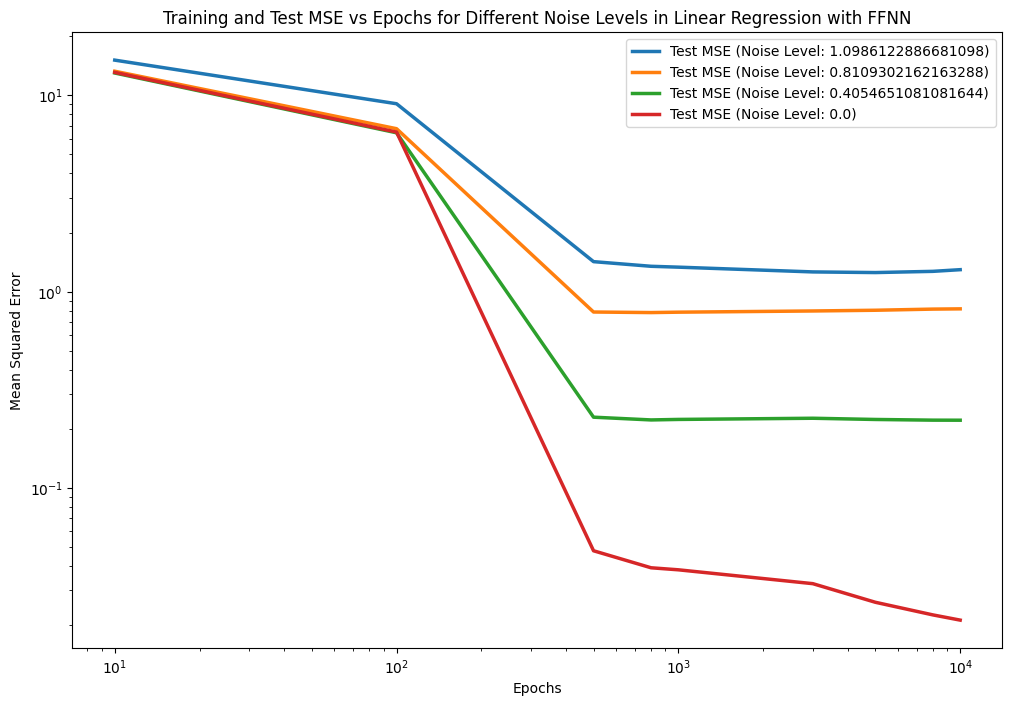

In [ ]:
# Linear Regression different epochs and different noise
from packages import *
from FFNeuralNetwork import *

np.random.seed(2024)

def SkrankeFunction(x, y):
    return np.ravel(0 + 1 * x + 2 * y + 3 * x**2 + 4 * x * y + 5 * y**2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y ** k)

    return X

step = 0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree = 3
X = create_X(x, y, poly_degree)

# Split data into train and test sets
X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
hidden_nodes1 = 60
hidden_nodes2 = 30
hidden_nodes3 = 15
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, hidden_nodes3, output_nodes)

# Noise levels to add to the target function
noise_levels = [np.log(abs(-3.0)),
                np.log(abs(-2.25)),
                np.log(abs(-1.5)), 
                np.log(abs(-1))]

epoch_values = [10, 100, 500, 800, 1000, 3000, 5000, 8000, 10000]

# Dictionaries to hold training and test MSE for each noise level
train_errors = {noise: [] for noise in noise_levels}
test_errors = {noise: [] for noise in noise_levels}

# Loop over each noise level
for noise in noise_levels:
    # Create noisy target
    target_noisy = SkrankeFunction(x, y).reshape(x.shape) + np.random.normal(0, noise, x.shape)
    target_noisy = target_noisy.reshape(-1, 1)

    # Split data into train and test sets
    X_train, X_test, t_train, t_test = train_test_split(X, target_noisy, test_size=0.2)

    # Initialize and set up FFNN
    linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
    scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
    
    # Loop over different epoch values
    for epochs in epoch_values:
        # Reset the model weights
        linear_regression.reset_weights()
        
        # Train the model with the specified number of epochs
        linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=epochs)
        
        # Predict on the training set
        train_predictions = linear_regression.predict(X_train)
        # Predict on the test set
        test_predictions = linear_regression.predict(X_test)
        
        # Calculate training and test MSE
        train_mse = mean_squared_error(t_train, train_predictions)
        test_mse = mean_squared_error(t_test, test_predictions)
        
        # Append to results for this noise level
        train_errors[noise].append(train_mse)
        test_errors[noise].append(test_mse)

    # Print final MSE for each noise level
    print(f"Noise Level: {noise}")
    print(f"Final Training MSE: {train_errors[noise][-1]}")
    print(f"Final Test MSE: {test_errors[noise][-1]}")
    print('-' * 40)

# Plot the training and test MSE for each noise level over different epochs
plt.figure(figsize=(12, 8))
for noise in noise_levels:
    plt.plot(epoch_values, test_errors[noise], label=f"Test MSE (Noise Level: {noise:.4f})", linewidth=2.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("log(Epochs)")
plt.ylabel("log(MSE)")
plt.title("Test MSE vs Epochs for Different Noise Levels in Linear Regression with FFNN")
plt.legend()
plt.show()


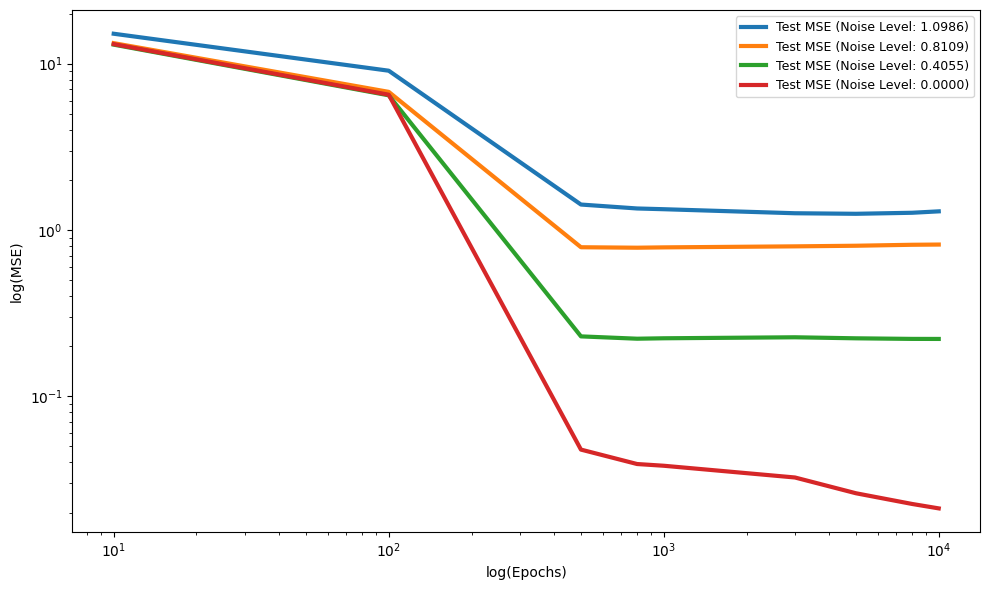

In [19]:
import matplotlib.pyplot as plt
from packages import *

warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.figure(figsize=(10, 6))  # Adjusted size for two-column layout
for noise in noise_levels:
    plt.plot(epoch_values, test_errors[noise], label=f"Test MSE (Noise Level: {noise:.4f})", linewidth=3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("log(Epochs)", fontsize=10)  # Smaller font size
plt.ylabel("log(MSE)", fontsize=10)     # Smaller font size
# plt.title("Test MSE vs Epochs\nfor Different Noise Levels in Linear Regression with FFNN", fontsize=12)  # Adjust title size
plt.legend(fontsize=9)  # Smaller legend font size
plt.tight_layout()  # Automatically adjust subplots to fit in the figure area

# Save the figure as a PDF
plt.savefig('images/test_mse_vs_epochs.pdf', bbox_inches='tight', dpi=300)  # Save as PDF with tight layout
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from packages import *
from FFNeuralNetwork import *

np.random.seed(2024)

def SkrankeFunction(x, y):
    return np.ravel(0 + 1 * x + 2 * y + 3 * x ** 2 + 4 * x * y + 5 * y ** 2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y ** k)

    return X

# Generate data
step = 0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y).reshape(-1, 1)
poly_degree = 3
X = create_X(x, y, poly_degree)

# Define hidden layer configurations to test
hidden_layer_configs = [
    (100,),
    (200,),
    (300,),
    (400,),
    (100, 50),
    (200, 100),
    (300, 200, 100),
    (400, 300, 200),
    (500, 400, 300, 200),
    (600, 500, 400, 300),
    (700, 600, 500, 400, 300),
    (800, 700, 600, 500, 400, 300),
]

# Define noise levels
noise_levels = [0.01]  # Only the first noise level
epochs = 2000
train_errors = []
test_errors = []

# Loop over each noise level
for noise in noise_levels:
    # Create noisy target
    target_noisy = target + np.random.normal(0, noise, target.shape)

    # Split data into train and test sets
    X_train, X_test, t_train, t_test = train_test_split(X, target_noisy, test_size=0.2)

    # Loop over each hidden layer configuration
    for config in hidden_layer_configs:
        # Define the dimensions for each configuration
        dims = (X_train.shape[1], *config, 1)  # Input layer, hidden layers, output layer

        # Initialize and reset the model with the current hidden layer configuration
        linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
        linear_regression.reset_weights()

        # Train the model
        linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=epochs)

        # Predict on train and test sets
        train_predictions = linear_regression.predict(X_train)
        test_predictions = linear_regression.predict(X_test)

        # Calculate training and test errors (MSE)
        train_error = mean_squared_error(t_train, train_predictions)
        test_error = mean_squared_error(t_test, test_predictions)

        train_errors.append(train_error)
        test_errors.append(test_error)

# Plot the training and test errors for the first noise level
plt.figure(figsize=(12, 8))
plt.plot([str(config) for config in hidden_layer_configs], train_errors, label="Training Error", linestyle='-', linewidth=2.5)
plt.plot([str(config) for config in hidden_layer_configs], test_errors, label="Test Error", linestyle='-', linewidth=2.5)

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Mean Squared Error (log scale)")
plt.title("Training and Test Errors vs Hidden Layer Configurations")
plt.xticks(rotation=45)
plt.legend()
plt.show()


Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0%                       Adam: Eta=0.001, Lambda=0.0001
  [=========================>--------------] 65.40% | train_error: 0.130  

Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0280 Hidden Layer Configuration: (100,)
Final Training MSE: 0.030079595429828042
Final Test MSE: 0.030719654711862714
----------------------------------------
Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.143  Hidden Layer Configuration: (200,)
Final Training MSE: 0.15543632986982242
Final Test MSE: 0.19686380423637548
----------------------------------------
Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.224  Hidden Layer Configuration: (300,)
Final Training MSE: 0.23916034053514124
Final Test MSE: 0.1980569205089451
----------------------------------------
Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.396  Hidden Layer Configuration: (400,)
Final Training MSE: 0.3917091985987366
Final Test MSE: 0.3874656557575837
--------------

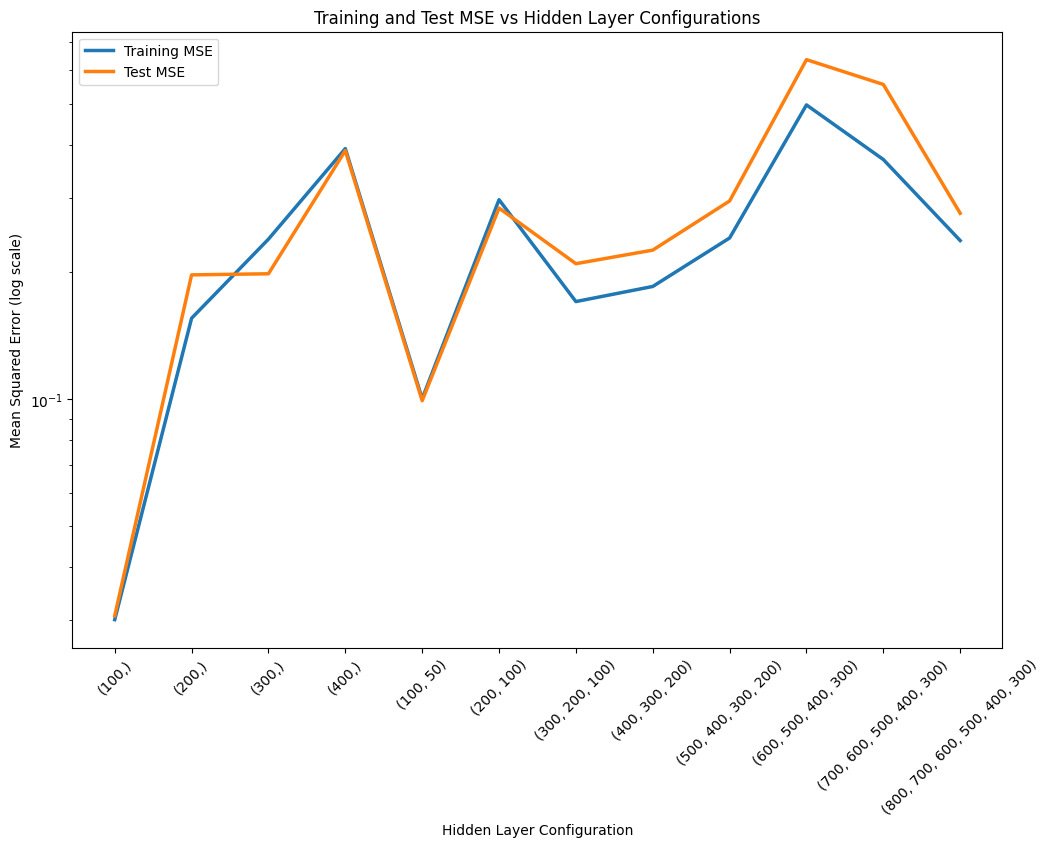

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from packages import *
from FFNeuralNetwork import *

np.random.seed(2024)

def SkrankeFunction(x, y):
    return np.ravel(0 + 1 * x + 2 * y + 3 * x ** 2 + 4 * x * y + 5 * y ** 2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y ** k)

    return X

# Generate data
step = 0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y).reshape(-1, 1)
poly_degree = 3
X = create_X(x, y, poly_degree)

# Define hidden layer configurations to test
hidden_layer_configs = [
    (100,),
    (200,),
    (300,),
    (400,),
    (100, 50),
    (200, 100),
    (300, 200, 100),
    (400, 300, 200),
    (500, 400, 300, 200),
    (600, 500, 400, 300),
    (700, 600, 500, 400, 300),
    (800, 700, 600, 500, 400, 300),
]

# Define noise levels
noise_levels = [0.01]  # Only the first noise level
epochs = 2000
train_errors = []
test_errors = []

# Loop over each noise level
for noise in noise_levels:
    # Create noisy target
    target_noisy = target + np.random.normal(0, noise, target.shape)

    # Split data into train and test sets
    X_train, X_test, t_train, t_test = train_test_split(X, target_noisy, test_size=0.2)

    # Loop over each hidden layer configuration
    for config in hidden_layer_configs:
        # Define the dimensions for each configuration
        dims = (X_train.shape[1], *config, 1)  # Input layer, hidden layers, output layer

        # Initialize and reset the model with the current hidden layer configuration
        scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
        linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
        linear_regression.reset_weights()

        # Train the model
        linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=epochs)

        # Predict on train and test sets
        train_predictions = linear_regression.predict(X_train)
        test_predictions = linear_regression.predict(X_test)

        # Calculate training and test errors (MSE)
        train_error = mean_squared_error(t_train, train_predictions)
        test_error = mean_squared_error(t_test, test_predictions)

        train_errors.append(train_error)
        test_errors.append(test_error)

        # Print final MSE for each configuration
        print(f"Hidden Layer Configuration: {config}")
        print(f"Final Training MSE: {train_error}")
        print(f"Final Test MSE: {test_error}")
        print('-' * 40)

# Plot the training and test errors for the first noise level
plt.figure(figsize=(12, 8))
plt.plot([str(config) for config in hidden_layer_configs], train_errors, label="Training MSE", linestyle='-', linewidth=2.5)
plt.plot([str(config) for config in hidden_layer_configs], test_errors, label="Test MSE", linestyle='-', linewidth=2.5)

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Mean Squared Error (log scale)")
plt.title("Training and Test MSE vs Hidden Layer Configurations")
plt.xticks(rotation=45)
plt.legend()
plt.show()

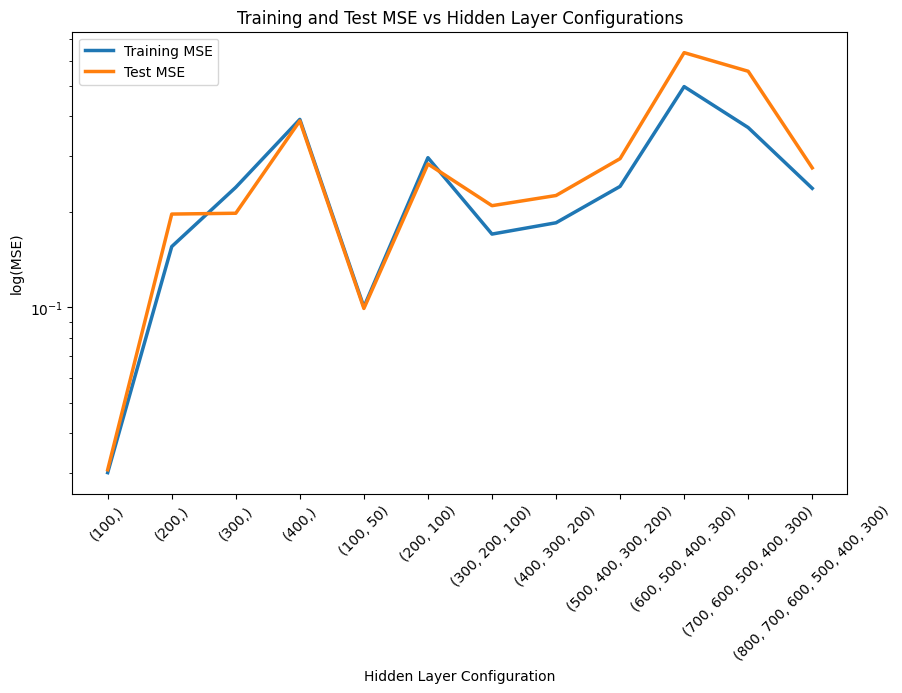

In [ ]:
import matplotlib.pyplot as plt
from packages import *

warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.figure(figsize=(10, 6))
plt.plot([str(config) for config in hidden_layer_configs], train_errors, label="Training MSE", linestyle='-', linewidth=3)
plt.plot([str(config) for config in hidden_layer_configs], test_errors, label="Test MSE", linestyle='-', linewidth=3)

plt.yscale('log')
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("log(MSE)", fontsize=10)
plt.xticks(rotation=45)
plt.legend()

plt.savefig('images/MSE_vs_Hidden_Layer_Configurations.pdf', bbox_inches='tight', dpi=300)  # Save as PDF with tight layout
plt.show()

In [ ]:
# Linear Regression Franke Function
from packages import *
from FFNeuralNetwork import *

np.random.seed(2024)

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = franke_function(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=5
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
hidden_nodes1 = 500
hidden_nodes2 = 250
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
# scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=5000)

# OLS using Scikit-Learn
ols_model = LinearRegression()
ols_model.fit(X_train, t_train)
ols_predictions = ols_model.predict(X_test)
ols_mse = mean_squared_error(t_test, ols_predictions)

# Ridge using Scikit-Learn
ridge_model = Ridge(alpha=1e-4)
ridge_model.fit(X_train, t_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(t_test, ridge_predictions)

# FFNN predictions
ffnn_predictions = linear_regression.predict(X_test)
ffnn_mse = mean_squared_error(t_test, ffnn_predictions)

print(f'\nOutput Franke Function:')
print(f"OLS MSE:\t{ols_mse}")
print(f"Ridge MSE:\t{ridge_mse}")
print(f"FFNN MSE:\t{ffnn_mse}")

Adam: Eta=0.001, Lambda=0


  [=======================================>] 100.0% | train_error: 0.876 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.186   
Output Franke Function:
OLS MSE:	0.0026093433625198996
Ridge MSE:	0.0035740018146377716
FFNN MSE:	0.3396722818637746


Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0408 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.139  Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.343  Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.544  Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.00965 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0605  Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0375 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0747 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0680 Adam: Eta=0.001, Lambda=0.0001
  [===================

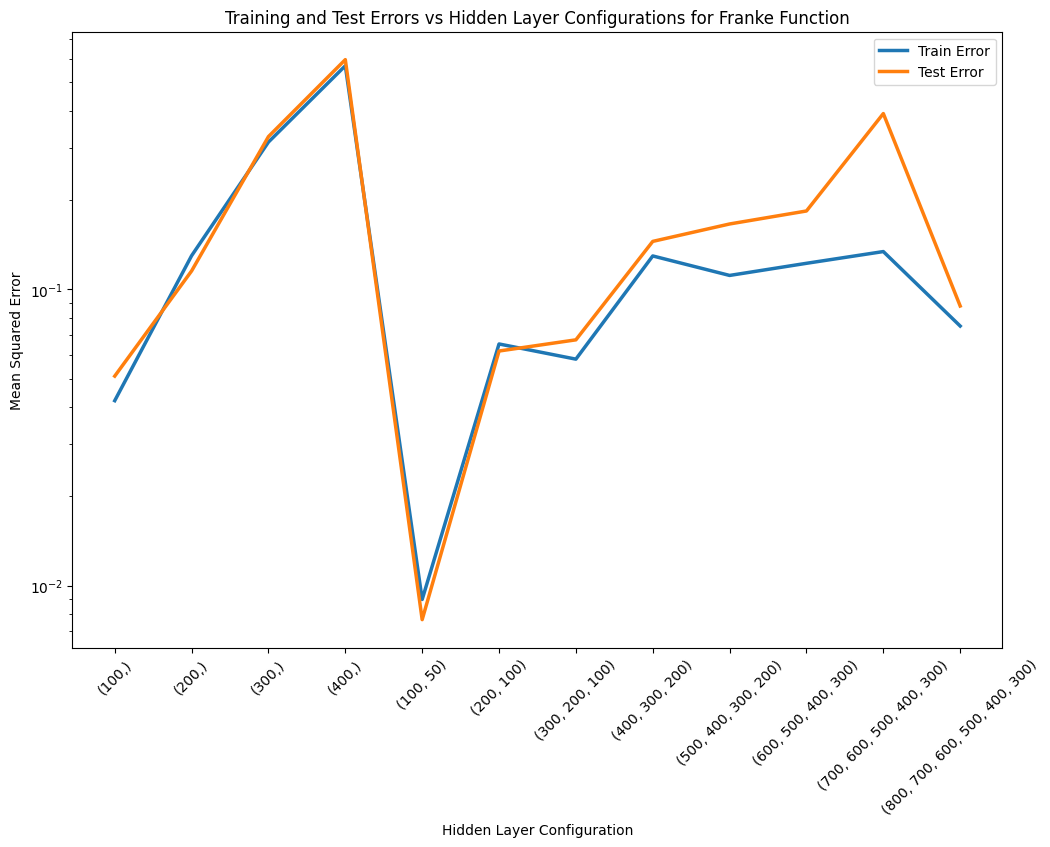

In [2]:
# Import necessary libraries and modules
from packages import *
from FFNeuralNetwork import *

np.random.seed(2024)

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y ** k)

    return X

# Create meshgrid and target
step = 0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = franke_function(x, y)
target = target.reshape(target.shape[0], 1)

# Polynomial degree for feature expansion
poly_degree = 5
X = create_X(x, y, poly_degree)

# Split data into train and test sets
X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
output_nodes = 1

# Hidden layer configurations
hidden_layer_configs = [
    (100,),
    (200,),
    (300,),
    (400,),
    (100, 50),
    (200, 100),
    (300, 200, 100),
    (400, 300, 200),
    (500, 400, 300, 200),
    (600, 500, 400, 300),
    (700, 600, 500, 400, 300),
    (800, 700, 600, 500, 400, 300),
]

# Dictionaries to hold training and test errors for each hidden layer configuration
train_errors = {}
test_errors = {}

# Loop over each hidden layer configuration
for config in hidden_layer_configs:
    dims = (input_nodes, *config, output_nodes)
    
    # Initialize FFNN and reset weights
    linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
    linear_regression.reset_weights()
    
    # Define optimizer
    scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
    
    # Train the model
    scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=5000)
    
    # Predict on the training and test sets
    train_predictions = linear_regression.predict(X_train)
    test_predictions = linear_regression.predict(X_test)
    
    # Calculate training and test errors
    train_mse = mean_squared_error(t_train, train_predictions)
    test_mse = mean_squared_error(t_test, test_predictions)
    
    # Store the errors for this configuration
    train_errors[config] = train_mse
    test_errors[config] = test_mse

# Plot the training and test errors for each hidden layer configuration
plt.figure(figsize=(12, 8))
configs = [str(config) for config in hidden_layer_configs]
train_mses = [train_errors[config] for config in hidden_layer_configs]
test_mses = [test_errors[config] for config in hidden_layer_configs]

plt.plot(configs, train_mses, label="Train Error", linestyle='-', linewidth=2.5)
plt.plot(configs, test_mses, label="Test Error", linestyle='-', linewidth=2.5)

plt.yscale('log')
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Errors vs Hidden Layer Configurations for Franke Function")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0212 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0377 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0242 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0230 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0209 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0135 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0360 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0214 Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0234 Adam: Eta=0.001, Lambda=0.0001
  [=====================

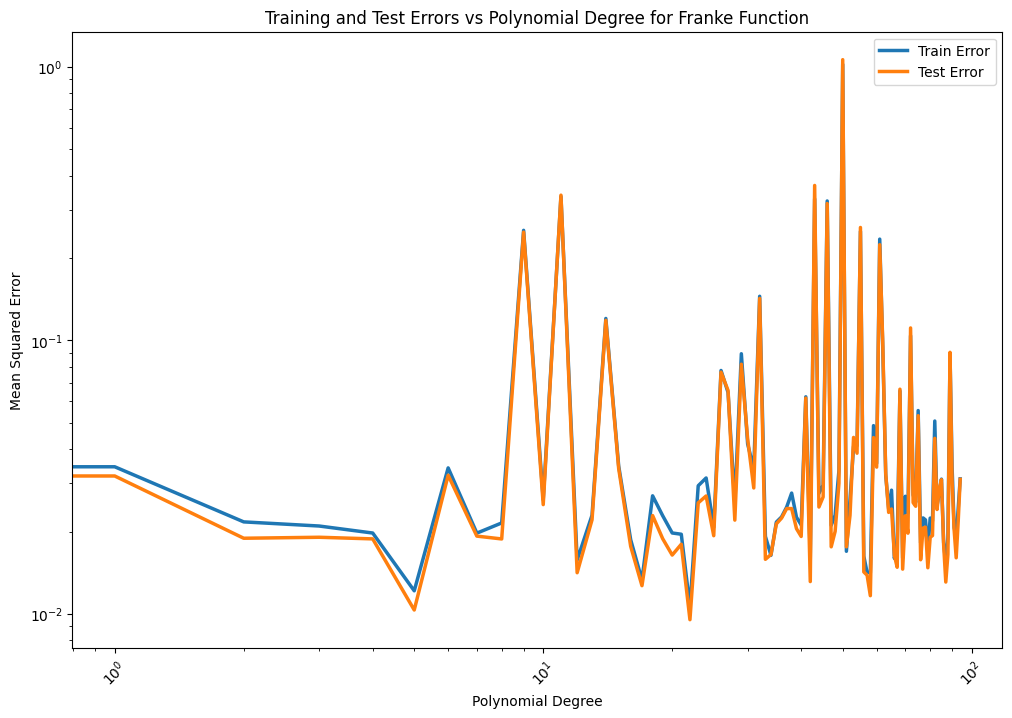

In [8]:
# Linear Regression with Franke Function for Different Polynomial Degrees
from packages import *
from FFNeuralNetwork import *

np.random.seed(2024)

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y ** k)

    return X

# Create meshgrid and target
step = 0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = franke_function(x, y)
target = target.reshape(target.shape[0], 1)

# Polynomial degrees to test
poly_degrees = np.arange(5, 100)
# Store MSE results
train_errors = {}
test_errors = {}

# Loop over each polynomial degree
for poly_degree in poly_degrees:
    # Create the design matrix
    X = create_X(x, y, poly_degree)
    
    # Split data into train and test sets
    X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

    input_nodes = X_train.shape[1]
    hidden_nodes1 = 5
    output_nodes = 1

    dims = (input_nodes, hidden_nodes1, output_nodes)

    # Initialize FFNN and reset weights
    linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
    linear_regression.reset_weights()

    # Define optimizer
    scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)

    # Train the model
    scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=500)
    
    # Predict on the training and test sets
    train_predictions = linear_regression.predict(X_train)
    test_predictions = linear_regression.predict(X_test)

    # Calculate training and test errors
    train_mse = mean_squared_error(t_train, train_predictions)
    test_mse = mean_squared_error(t_test, test_predictions)

    # Store the errors for this polynomial degree
    train_errors[poly_degree] = train_mse
    test_errors[poly_degree] = test_mse

# Plot the training and test errors for each polynomial degree
plt.figure(figsize=(12, 8))
degrees = [str(degree) for degree in poly_degrees]
train_mses = [train_errors[degree] for degree in poly_degrees]
test_mses = [test_errors[degree] for degree in poly_degrees]

plt.plot(degrees, train_mses, label="Train Error", linestyle='-', linewidth=2.5)
plt.plot(degrees, test_mses, label="Test Error", linestyle='-', linewidth=2.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Errors vs Polynomial Degree for Franke Function")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Adam: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0109 

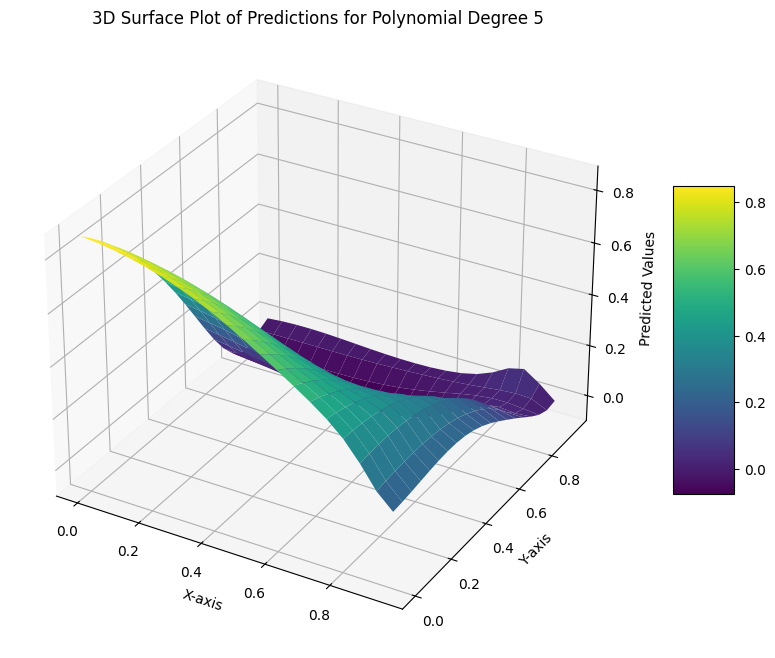

In [3]:
# Linear Regression with Franke Function for Polynomial Degree 5
from packages import *
from FFNeuralNetwork import *

np.random.seed(2024)

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y ** k)

    return X

# Create meshgrid and target
step = 0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = franke_function(x, y)
target = target.reshape(target.shape[0], 1)

# Polynomial degree
poly_degree = 400
X = create_X(x, y, poly_degree)

# Split data into train and test sets
X_train, X_test, t_train, t_test = train_test_split(X, target, test_size=0.2)

input_nodes = X_train.shape[1]
hidden_nodes1 = 20
hidden_nodes2 = 5
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
linear_regression = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2024)
linear_regression.reset_weights()

# Define optimizer
scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)

# Train the model
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=1000)

# Predict on the entire input space for 3D plotting
X_full = create_X(x, y, poly_degree)
predictions = linear_regression.predict(X_full)

# Reshape predictions to match the grid
predictions = predictions.reshape(x.shape)

# Plotting the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(x, y, predictions, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Predicted Values')
ax.set_title('3D Surface Plot of Predictions for Polynomial Degree 5')

# Show color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Test different activation functions (C)

In [ ]:
from packages import *
from FFNeuralNetwork import *

def SkrankeFunction(x, y):
    return np.ravel(0 + 1*x + 2*y + 3*x**2 + 4*x*y + 5*y**2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=3
X = create_X(x, y, poly_degree)

# Set up k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=2024)

# Initialize arrays to hold regression metrics
mse_list_sigmoid, mse_list_relu, mse_list_lrelu = [], [], []
r2_list_sigmoid, r2_list_relu, r2_list_lrelu = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    t_train, t_val = target[train_index], target[test_index]

    input_nodes = X_train.shape[1]
    hidden_nodes1 = 100
    hidden_nodes2 = 30
    output_nodes = 1

    dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
    scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)

    # FFNN with Sigmoid output function
    model_sigmoid = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2023)
    model_sigmoid.reset_weights()
    model_sigmoid.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    preds_sigmoid = model_sigmoid.predict(X_val)
    mse_list_sigmoid.append(mean_squared_error(t_val, preds_sigmoid))
    r2_list_sigmoid.append(r2_score(t_val, preds_sigmoid))

    # FFNN with ReLU output function
    model_relu = FFNN(dims, hidden_func=RELU, output_func=identity, cost_func=CostOLS, seed=2023)
    model_relu.reset_weights()
    model_relu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    preds_relu = model_relu.predict(X_val)
    mse_list_relu.append(mean_squared_error(t_val, preds_relu))
    r2_list_relu.append(r2_score(t_val, preds_relu))

    # FFNN with Leaky ReLU output function
    model_lrelu = FFNN(dims, hidden_func=LRELU, output_func=identity, cost_func=CostOLS, seed=2023)
    model_lrelu.reset_weights()
    model_lrelu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    preds_lrelu = model_lrelu.predict(X_val)
    mse_list_lrelu.append(mean_squared_error(t_val, preds_lrelu))
    r2_list_lrelu.append(r2_score(t_val, preds_lrelu))
    

# metrics folds
avg_mse_sigmoid = np.mean(mse_list_sigmoid)
avg_r2_sigmoid = np.mean(r2_list_sigmoid)

avg_mse_relu = np.mean(mse_list_relu)
avg_r2_relu = np.mean(r2_list_relu)

avg_mse_lrelu = np.mean(mse_list_lrelu)
avg_r2_lrelu = np.mean(r2_list_lrelu)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Linear Regr
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_test_pred = lin_reg.predict(X_test)
lin_test_r2 = r2_score(y_test, lin_test_pred)
lin_cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_cv_mse = -np.mean(lin_cv_scores)

# Ridge Reg
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_test_pred = ridge_reg.predict(X_test)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_cv_scores = cross_val_score(ridge_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
ridge_cv_mse = -np.mean(ridge_cv_scores)

# results
print('\n')
print(f'Sigmoid MSE:\t{avg_mse_sigmoid:.4f}, R²:\t{avg_r2_sigmoid:.4f}')
print(f'ReLU MSE:\t{avg_mse_relu:.4f}, R²:\t{avg_r2_relu:.4f}')
print(f'Leaky ReLU MSE:\t{avg_mse_lrelu:.4f}, R²:\t{avg_r2_lrelu:.4f}')
print(f"Linear Reg MSE:\t{lin_cv_mse:.4f}, R²:\t{lin_test_r2:.4f}")
print(f"Ridge RegMSE:\t{ridge_cv_mse:.4f}, R²:\t{ridge_test_r2:.4f}")

Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0573 | val_error: 0.0280 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 1.33 | val_error: 1.82   Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 1.35 | val_error: 1.87   Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0429 | val_error: 0.0281 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 1.33 | val_error: 2.35   Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 1.33 | val_error: 2.38   Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0624 | val_error: 0.0361 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 1.37 | val_error: 1.85   Adam: Eta=0.001, Lambda=0
  [=====================

In [ ]:
from packages import *
from FFNeuralNetwork import *

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.05
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = franke_function(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=5
X = create_X(x, y, poly_degree)

# Set up k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=2024)

# Initialize arrays to hold regression metrics
mse_list_sigmoid, mse_list_relu, mse_list_lrelu = [], [], []
r2_list_sigmoid, r2_list_relu, r2_list_lrelu = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    t_train, t_val = target[train_index], target[test_index]

    input_nodes = X_train.shape[1]
    hidden_nodes1 = 100
    hidden_nodes2 = 30
    output_nodes = 1

    dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
    scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)

    # FFNN with Sigmoid output function
    model_sigmoid = FFNN(dims, hidden_func=sigmoid, output_func=identity, cost_func=CostOLS, seed=2023)
    model_sigmoid.reset_weights()
    model_sigmoid.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    preds_sigmoid = model_sigmoid.predict(X_val)
    mse_list_sigmoid.append(mean_squared_error(t_val, preds_sigmoid))
    r2_list_sigmoid.append(r2_score(t_val, preds_sigmoid))

    # FFNN with ReLU output function
    model_relu = FFNN(dims, hidden_func=RELU, output_func=identity, cost_func=CostOLS, seed=2023)
    model_relu.reset_weights()
    model_relu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    preds_relu = model_relu.predict(X_val)
    mse_list_relu.append(mean_squared_error(t_val, preds_relu))
    r2_list_relu.append(r2_score(t_val, preds_relu))

    # FFNN with Leaky ReLU output function
    model_lrelu = FFNN(dims, hidden_func=LRELU, output_func=identity, cost_func=CostOLS, seed=2023)
    model_lrelu.reset_weights()
    model_lrelu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    preds_lrelu = model_lrelu.predict(X_val)
    mse_list_lrelu.append(mean_squared_error(t_val, preds_lrelu))
    r2_list_lrelu.append(r2_score(t_val, preds_lrelu))

# Calculate average metrics across folds
avg_mse_sigmoid = np.mean(mse_list_sigmoid)
avg_r2_sigmoid = np.mean(r2_list_sigmoid)

avg_mse_relu = np.mean(mse_list_relu)
avg_r2_relu = np.mean(r2_list_relu)

avg_mse_lrelu = np.mean(mse_list_lrelu)
avg_r2_lrelu = np.mean(r2_list_lrelu)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Linear Regr
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_test_pred = lin_reg.predict(X_test)
lin_test_r2 = r2_score(y_test, lin_test_pred)
lin_cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_cv_mse = -np.mean(lin_cv_scores)

# Ridge Reg
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_test_pred = ridge_reg.predict(X_test)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_cv_scores = cross_val_score(ridge_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
ridge_cv_mse = -np.mean(ridge_cv_scores)

# results
print('\n')
print(f'Output Franke Function:')
print(f'Sigmoid MSE:\t{avg_mse_sigmoid:.4f}, R²:\t{avg_r2_sigmoid:.4f}')
print(f'ReLU MSE:\t{avg_mse_relu:.4f}, R²:\t{avg_r2_relu:.4f}')
print(f'Leaky ReLU MSE:\t{avg_mse_lrelu:.4f}, R²:\t{avg_r2_lrelu:.4f}')
print(f"Linear Reg MSE:\t{lin_cv_mse:.4f}, R²:\t{lin_test_r2:.4f}")
print(f"Ridge RegMSE:\t{ridge_cv_mse:.4f}, R²:\t{ridge_test_r2:.4f}")

Adam: Eta=0.001, Lambda=0
  [----------------------------------------] 0.000% | train_error: 50.6 | val_error: 51.3 

  [=======================================>] 100.0% | train_error: 0.0334 | val_error: 0.0377 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 7.26 | val_error: 3.99  Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 7.43 | val_error: 4.20  Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0302 | val_error: 0.0230 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 7.63 | val_error: 9.73  Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 7.59 | val_error: 9.74  Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0310 | val_error: 0.0356 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 7.40 | val_error: 8.42  Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | t

## Classification (D)

Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0486 | train_acc: 0.998 | val_error: 0.725 | val_acc: 0.965 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.341 | train_acc: 0.984 | val_error: 2.32 | val_acc: 0.888 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.341 | train_acc: 0.984 | val_error: 2.32 | val_acc: 0.888 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 2.38 | train_acc: 0.885 | val_error: 3.19 | val_acc: 0.846  

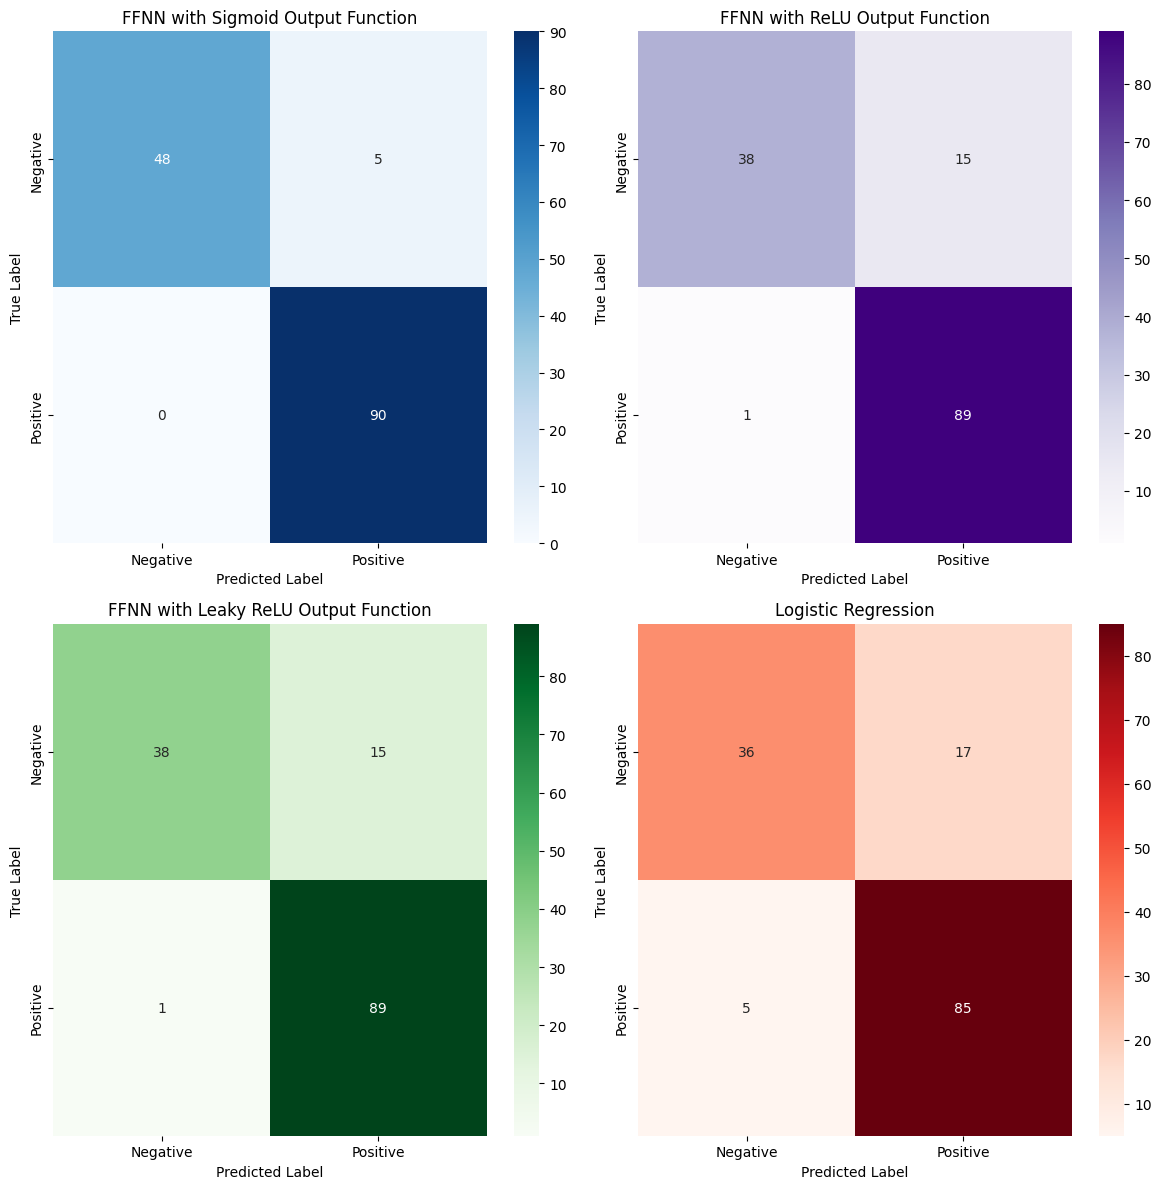

FFNN Sigmoid Accuracy:		0.97
FFNN RELU Accuracy:		0.89
FFNN LRELU Regression Accuracy:	0.89
Logistic Regression Accuracy:	0.85


In [5]:
# Breast cancer (ADAM)
from packages import *
from FFNeuralNetwork import *

wisconsin = load_breast_cancer()
X = wisconsin.data
target = wisconsin.target
target = target.reshape(target.shape[0], 1)

X_train, X_val, t_train, t_val = train_test_split(X, target)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

input_nodes = X_train.shape[1]
hidden_nodes1 = 100
hidden_nodes2 = 30
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)

# FFNN with Sigmoid output function
model_sigmoid = FFNN(dims, hidden_func=sigmoid, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
model_sigmoid.reset_weights()
model_sigmoid.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

# FFNN with ReLU output function
model_relu = FFNN(dims, hidden_func=RELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
model_relu.reset_weights()
model_relu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

# FFNN with Leaky ReLU output function
model_lrelu = FFNN(dims, hidden_func=LRELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
model_lrelu.reset_weights()
model_lrelu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

# FFNN with Logistic Regression
model_logreg = FFNN((input_nodes, output_nodes), output_func=sigmoid, cost_func=CostLogReg, seed=2023)
model_logreg.reset_weights()
model_logreg.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

y_pred_sigmoid = model_sigmoid.predict(X_val)
y_pred_relu = model_relu.predict(X_val)
y_pred_lrelu = model_lrelu.predict(X_val)
y_pred_logreg = model_logreg.predict(X_val)

y_pred_sigmoid_binary = (y_pred_sigmoid > 0.5).astype(int)
y_pred_relu_binary = (y_pred_relu > 0.5).astype(int)
y_pred_lrelu_binary = (y_pred_lrelu > 0.5).astype(int)
y_pred_logreg_binary = (y_pred_logreg > 0.5).astype(int)

cm_sigmoid = confusion_matrix(t_val, y_pred_sigmoid_binary)
cm_relu = confusion_matrix(t_val, y_pred_relu_binary)
cm_lrelu = confusion_matrix(t_val, y_pred_lrelu_binary)
cm_logreg = confusion_matrix(t_val, y_pred_logreg_binary)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns

# Plot confusion matrix for FFNN with Sigmoid
sns.heatmap(cm_sigmoid, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[0, 0].set_title('FFNN with Sigmoid Output Function')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')

# Plot confusion matrix for FFNN with ReLU
sns.heatmap(cm_relu, annot=True, fmt='d', cmap='Purples', ax=axes[0, 1], xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[0, 1].set_title('FFNN with ReLU Output Function')
axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')

# Plot confusion matrix for FFNN with Leaky ReLU
sns.heatmap(cm_lrelu, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0], xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[1, 0].set_title('FFNN with Leaky ReLU Output Function')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# Plot confusion matrix for Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Reds', ax=axes[1, 1], xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[1, 1].set_title('Logistic Regression')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

print(f"FFNN Sigmoid Accuracy:\t\t{accuracy_score(t_val, y_pred_sigmoid):.2f}")
print(f"FFNN RELU Accuracy:\t\t{accuracy_score(t_val, y_pred_relu):.2f}")
print(f"FFNN LRELU Regression Accuracy:\t{accuracy_score(t_val, y_pred_lrelu):.2f}")
print(f"Logistic Regression Accuracy:\t{accuracy_score(t_val, y_pred_logreg):.2f}")

Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0810 | train_acc: 0.996 | val_error: 0.727 | val_acc: 0.965 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.121 | train_acc: 0.994 | val_error: 2.54 | val_acc: 0.877 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.121 | train_acc: 0.994 | val_error: 2.91 | val_acc: 0.860 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 3.32 | train_acc: 0.840 | val_error: 3.27 | val_acc: 0.842  Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.364 | train_acc: 0.982 | val_error: 0.364 | val_acc: 0.982 Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.445 | train_acc: 0.979 | val_error: 1.09 | val_acc: 0.947  : 1.00 Adam: Eta=0.001, Lambda=0
  [=======================================>] 

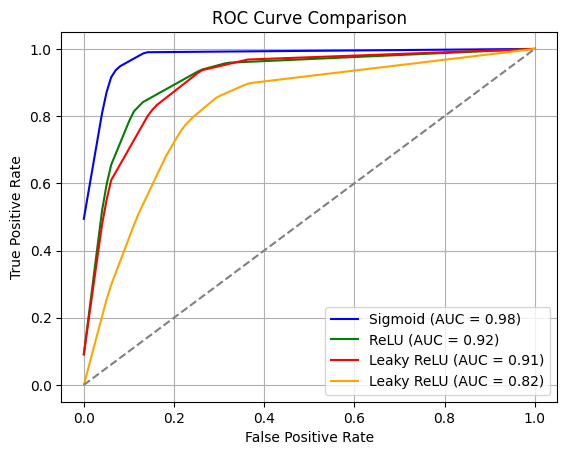

In [ ]:
from packages import *
from FFNeuralNetwork import *

# Brest cancer - Sigmoid (ADAM)

wisconsin = load_breast_cancer()
X = wisconsin.data
target = wisconsin.target
target = target.reshape(target.shape[0], 1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=2024)

fpr_mean = np.linspace(0, 1, 100)  # Fixed FPR points for interpolation
tpr_list_sigmoid, tpr_list_relu, tpr_list_lrelu, tpr_list_logreg = [], [], [], []

def calculate_roc(model, X_val, t_val):
    predictions = model.predict(X_val)
    predictions_prob = predictions.flatten()
    fpr, tpr, _ = roc_curve(t_val, predictions_prob)
    # Interpolate to common FPR points
    tpr_interpolated = interp1d(fpr, tpr, bounds_error=False, fill_value=(0, 1))(fpr_mean)
    return tpr_interpolated

for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    t_train, t_val = target[train_index], target[test_index]

    input_nodes = X_train.shape[1]
    hidden_nodes1 = 100
    hidden_nodes2 = 30
    output_nodes = 1

    dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
    scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)

    # FFNN with Sigmoid output function
    model_sigmoid = FFNN(dims,hidden_func=sigmoid,  output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_sigmoid.reset_weights()
    model_sigmoid.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_sigmoid.append(calculate_roc(model_sigmoid, X_val, t_val))

    # FFNN with ReLU output function
    model_relu = FFNN(dims, hidden_func=RELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_relu.reset_weights()
    model_relu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_relu.append(calculate_roc(model_relu, X_val, t_val))

    # FFNN with Leaky ReLU output function
    model_lrelu = FFNN(dims, hidden_func=LRELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_lrelu.reset_weights()
    model_lrelu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_lrelu.append(calculate_roc(model_lrelu, X_val, t_val))
    
    # FFNN with Logistic Regression
    model_logreg = FFNN((input_nodes, output_nodes),output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_logreg.reset_weights()
    model_logreg.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_logreg.append(calculate_roc(model_logreg, X_val, t_val))

# Average the interpolated TPR values across folds
mean_tpr_sigmoid = np.mean(tpr_list_sigmoid, axis=0)
mean_tpr_relu = np.mean(tpr_list_relu, axis=0)
mean_tpr_lrelu = np.mean(tpr_list_lrelu, axis=0)
mean_tpr_logreg = np.mean(tpr_list_logreg, axis=0)

# ROC curves
plt.figure()
plt.plot(fpr_mean, mean_tpr_sigmoid, color='b', label='Sigmoid (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_sigmoid))
plt.plot(fpr_mean, mean_tpr_relu, color='g', label='ReLU (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_relu))
plt.plot(fpr_mean, mean_tpr_lrelu, color='r', label='Leaky ReLU (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_lrelu))
plt.plot(fpr_mean, mean_tpr_logreg, color='orange', label='Logistic Regression (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_logreg))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Adam)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Adagrad: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.121 | train_acc: 0.994 | val_error: 0.727 | val_acc: 0.965 Adagrad: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0405 | train_acc: 0.998 | val_error: 1.82 | val_acc: 0.912 Adagrad: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0405 | train_acc: 0.998 | val_error: 1.82 | val_acc: 0.912 Adagrad: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 9.39 | train_acc: 0.547 | val_error: 6.91 | val_acc: 0.667  Adagrad: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.364 | train_acc: 0.982 | val_error: 0.364 | val_acc: 0.982 Adagrad: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.202 | train_acc: 0.990 | val_error: 0.364 | val_acc: 0.982 Adagrad: Eta=0.001, Lambda=0
  [===========================

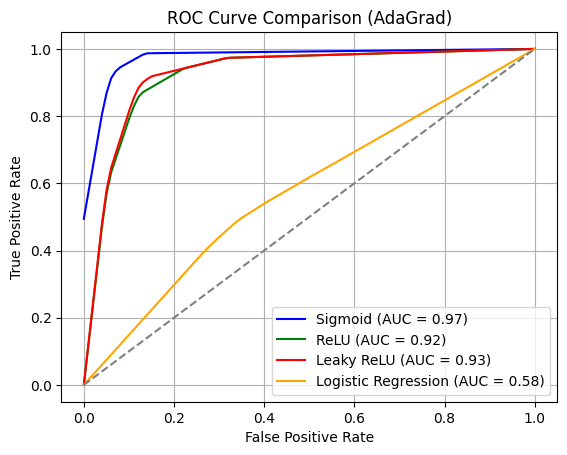

In [2]:
from packages import *
from FFNeuralNetwork import *

# Brest cancer - Sigmoid (ADAGRAD)
eta = 1e-3 
momentum = 0.9 

wisconsin = load_breast_cancer()
X = wisconsin.data
target = wisconsin.target
target = target.reshape(target.shape[0], 1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=2024)

fpr_mean = np.linspace(0, 1, 100)  # Fixed FPR points for interpolation
tpr_list_sigmoid, tpr_list_relu, tpr_list_lrelu, tpr_list_logreg = [], [], [], []

def calculate_roc(model, X_val, t_val):
    predictions = model.predict(X_val)
    predictions_prob = predictions.flatten()
    fpr, tpr, _ = roc_curve(t_val, predictions_prob)
    # Interpolate to common FPR points
    tpr_interpolated = interp1d(fpr, tpr, bounds_error=False, fill_value=(0, 1))(fpr_mean)
    return tpr_interpolated

for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    t_train, t_val = target[train_index], target[test_index]

    input_nodes = X_train.shape[1]
    hidden_nodes1 = 100
    hidden_nodes2 = 30
    output_nodes = 1

    dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
    scheduler = Adagrad(eta=eta)

    # FFNN with Sigmoid output function
    model_sigmoid = FFNN(dims,hidden_func=sigmoid,  output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_sigmoid.reset_weights()
    model_sigmoid.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_sigmoid.append(calculate_roc(model_sigmoid, X_val, t_val))

    # FFNN with ReLU output function
    model_relu = FFNN(dims, hidden_func=RELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_relu.reset_weights()
    model_relu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_relu.append(calculate_roc(model_relu, X_val, t_val))

    # FFNN with Leaky ReLU output function
    model_lrelu = FFNN(dims, hidden_func=LRELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_lrelu.reset_weights()
    model_lrelu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_lrelu.append(calculate_roc(model_lrelu, X_val, t_val))
    
    # FFNN with Logistic Regression
    model_logreg = FFNN((input_nodes, output_nodes),output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_logreg.reset_weights()
    model_logreg.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_logreg.append(calculate_roc(model_logreg, X_val, t_val))

# Average the interpolated TPR values across folds
mean_tpr_sigmoid = np.mean(tpr_list_sigmoid, axis=0)
mean_tpr_relu = np.mean(tpr_list_relu, axis=0)
mean_tpr_lrelu = np.mean(tpr_list_lrelu, axis=0)
mean_tpr_logreg = np.mean(tpr_list_logreg, axis=0)

# ROC curves
plt.figure()
plt.plot(fpr_mean, mean_tpr_sigmoid, color='b', label='Sigmoid (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_sigmoid))
plt.plot(fpr_mean, mean_tpr_relu, color='g', label='ReLU (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_relu))
plt.plot(fpr_mean, mean_tpr_lrelu, color='r', label='Leaky ReLU (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_lrelu))
plt.plot(fpr_mean, mean_tpr_logreg, color='orange', label='Logistic Regression (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_logreg))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (AdaGrad)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

RMS_prop: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.162 | train_acc: 0.992 | val_error: 1.09 | val_acc: 0.947 RMS_prop: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 1.21 | train_acc: 0.941 | val_error: 3.27 | val_acc: 0.842  RMS_prop: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 1.30 | train_acc: 0.938 | val_error: 3.27 | val_acc: 0.842  RMS_prop: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 2.06 | train_acc: 0.900 | val_error: 2.18 | val_acc: 0.895  RMS_prop: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.445 | train_acc: 0.979 | val_error: 0.364 | val_acc: 0.982 RMS_prop: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 1.42 | train_acc: 0.932 | val_error: 1.82 | val_acc: 0.912  RMS_prop: Eta=0.001, Lambda=0
  [========================

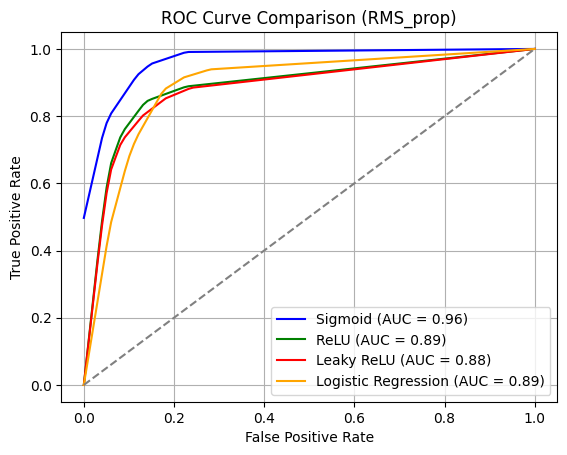

In [2]:
from packages import *
from FFNeuralNetwork import *

# Brest cancer - Sigmoid (RMS_prop)
eta = 1e-3 
momentum = 0.9 

wisconsin = load_breast_cancer()
X = wisconsin.data
target = wisconsin.target
target = target.reshape(target.shape[0], 1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=2024)

fpr_mean = np.linspace(0, 1, 100)  # Fixed FPR points for interpolation
tpr_list_sigmoid, tpr_list_relu, tpr_list_lrelu, tpr_list_logreg = [], [], [], []

def calculate_roc(model, X_val, t_val):
    predictions = model.predict(X_val)
    predictions_prob = predictions.flatten()
    fpr, tpr, _ = roc_curve(t_val, predictions_prob)
    # Interpolate to common FPR points
    tpr_interpolated = interp1d(fpr, tpr, bounds_error=False, fill_value=(0, 1))(fpr_mean)
    return tpr_interpolated

for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    t_train, t_val = target[train_index], target[test_index]

    input_nodes = X_train.shape[1]
    hidden_nodes1 = 100
    hidden_nodes2 = 30
    output_nodes = 1

    dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)
    scheduler = RMS_prop(eta=1e-3, rho=0.9)

    # FFNN with Sigmoid output function
    model_sigmoid = FFNN(dims,hidden_func=sigmoid,  output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_sigmoid.reset_weights()
    model_sigmoid.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_sigmoid.append(calculate_roc(model_sigmoid, X_val, t_val))

    # FFNN with ReLU output function
    model_relu = FFNN(dims, hidden_func=RELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_relu.reset_weights()
    model_relu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_relu.append(calculate_roc(model_relu, X_val, t_val))

    # FFNN with Leaky ReLU output function
    model_lrelu = FFNN(dims, hidden_func=LRELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_lrelu.reset_weights()
    model_lrelu.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_lrelu.append(calculate_roc(model_lrelu, X_val, t_val))
    
    # FFNN with Logistic Regression
    model_logreg = FFNN((input_nodes, output_nodes),output_func=sigmoid, cost_func=CostLogReg, seed=2023)
    model_logreg.reset_weights()
    model_logreg.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)
    tpr_list_logreg.append(calculate_roc(model_logreg, X_val, t_val))

# Average the interpolated TPR values across folds
mean_tpr_sigmoid = np.mean(tpr_list_sigmoid, axis=0)
mean_tpr_relu = np.mean(tpr_list_relu, axis=0)
mean_tpr_lrelu = np.mean(tpr_list_lrelu, axis=0)
mean_tpr_logreg = np.mean(tpr_list_logreg, axis=0)

# ROC curves
plt.figure()
plt.plot(fpr_mean, mean_tpr_sigmoid, color='b', label='Sigmoid (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_sigmoid))
plt.plot(fpr_mean, mean_tpr_relu, color='g', label='ReLU (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_relu))
plt.plot(fpr_mean, mean_tpr_lrelu, color='r', label='Leaky ReLU (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_lrelu))
plt.plot(fpr_mean, mean_tpr_logreg, color='orange', label='Logistic Regression (AUC = %0.2f)' % auc(fpr_mean, mean_tpr_logreg))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (RMS_prop)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

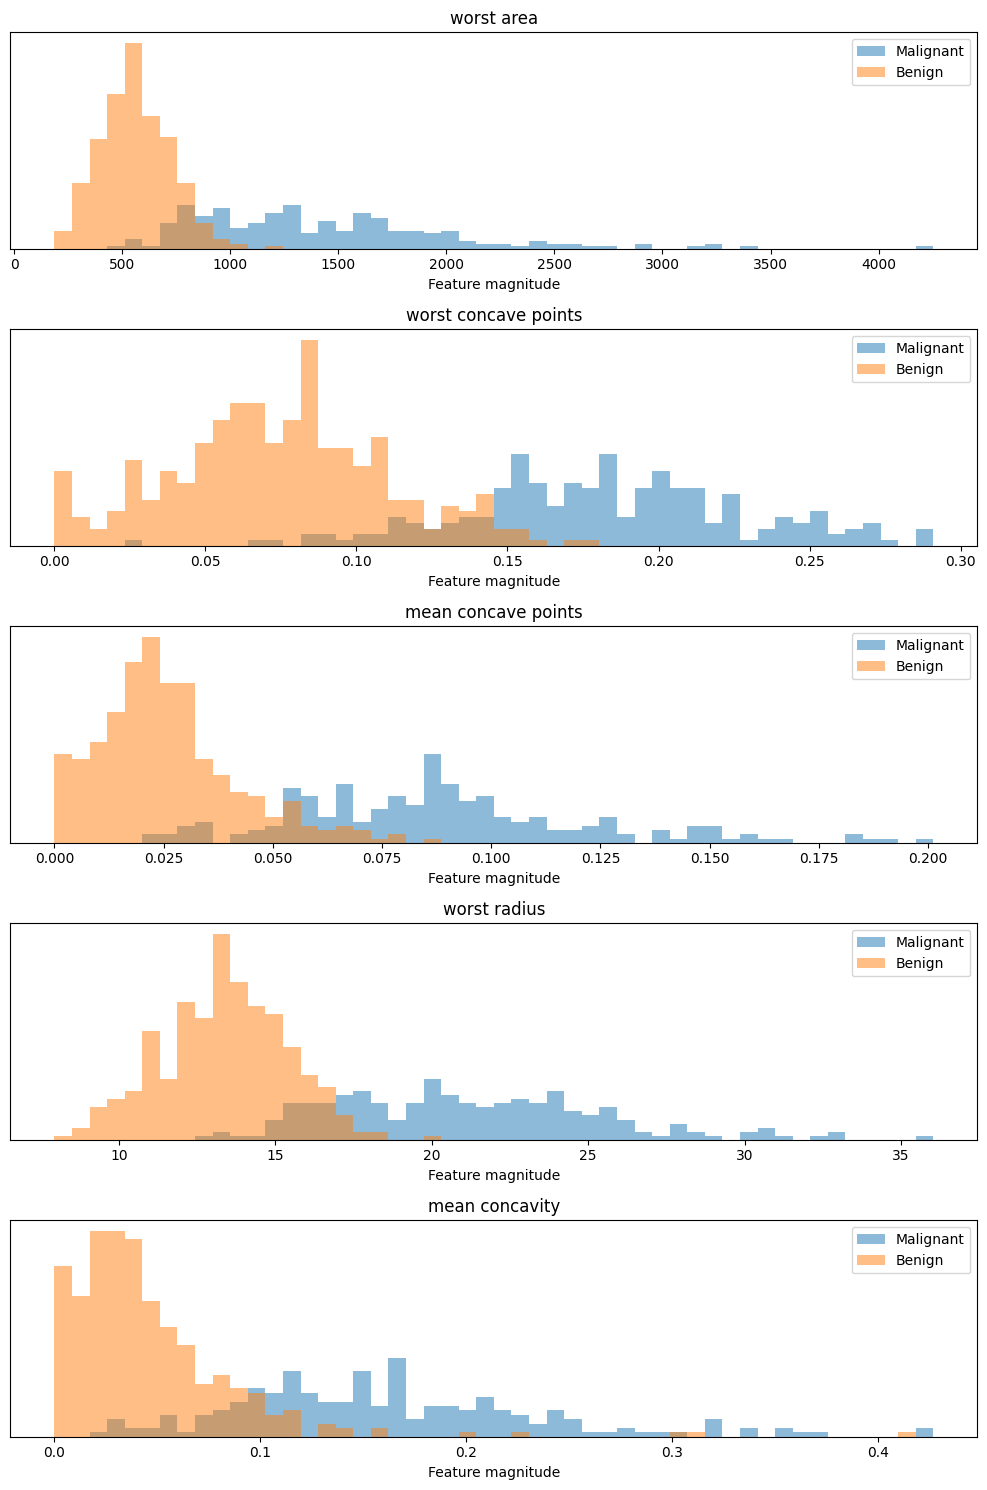

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Define the top 5 features to plot
top_features = [
    "worst area",
    "worst concave points",
    "mean concave points",
    "worst radius",
    "mean concavity"
]

# Create a new figure with one column
fig, axes = plt.subplots(len(top_features), 1, figsize=(10, 15))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

# Plotting each of the top features
for i, feature in enumerate(top_features):
    feature_index = cancer.feature_names.tolist().index(feature)
    _, bins = np.histogram(cancer.data[:, feature_index], bins=50)
    axes[i].hist(malignant[:, feature_index], bins=bins, alpha=0.5, label='Malignant')
    axes[i].hist(benign[:, feature_index], bins=bins, alpha=0.5, label='Benign')
    axes[i].set_title(feature)
    axes[i].set_yticks([])
    axes[i].set_xlabel("Feature magnitude")
    axes[i].legend(loc="best")

# Adjust layout
fig.tight_layout()
plt.show()
